<a href="https://colab.research.google.com/github/hahw94/DNN-ResNet-etc/blob/master/2_%EB%8B%A4%EC%A4%91%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80_%EB%AA%A8%EB%8D%B8_%EB%A7%8C%EB%93%A4%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# (코랩) 다중선형회귀 모델 만들기(GOCI PM10, 관측소 데이터 사용)

In [1]:
'''
;Column 0 is site number
;Column 1 is year
;Column 2 is month
;Column 3 is day        
;Column 4 is hour       
;Column 5 is AOD         
;Column 6 is FMF        
;Column 7 is SSA        
;Column 8 is AE         
;Column 9 is NDVI        
;Column10 is DAI         
;Column11 is SO2        
;Column12 is CO         
;Column13 is O3          
;Column14 is NO2        
;Column15 is PM10       
;Column16 is PM25         
;Column17 is temp     
;Column18 is wd      
;Column19 is ws     
;Column20 is rh     
;Column21 is PBLH    
;Column22 is tcc    
'''

'\n;Column 0 is site number\n;Column 1 is year\n;Column 2 is month\n;Column 3 is day        \n;Column 4 is hour       \n;Column 5 is AOD         \n;Column 6 is FMF        \n;Column 7 is SSA        \n;Column 8 is AE         \n;Column 9 is NDVI        \n;Column10 is DAI         \n;Column11 is SO2        \n;Column12 is CO         \n;Column13 is O3          \n;Column14 is NO2        \n;Column15 is PM10       \n;Column16 is PM25         \n;Column17 is temp     \n;Column18 is wd      \n;Column19 is ws     \n;Column20 is rh     \n;Column21 is PBLH    \n;Column22 is tcc    \n'

# 1. 구글 드라이브 저장소 마운트 및 사용 할 라이브러리 불러오기
- 코랩에서 개인 데이터를 사용하기 위해서는 구글 드라이브에 본인이 사용할 데이터를 업로드 해야한다
- 업로드 한 데이터를 불러오기 위해서는 구글 드라이브 저장소를 마운트해서 사용할 수 있게 해주어야한다.
- 본인이 사용할 라이브러리는 코드를 짜기전 미리 전부 불러와야 한다.

In [2]:
from google.colab import drive 
drive.mount('/gdrive')
# 구글 드라이브 저장소 마운트 하기

Mounted at /gdrive


In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import time
import itertools
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# 2. 데이터 불러오기
- 먼저 구글드라이브에 사용할 데이터를 업로드 하고 해당 디렉토리로 접속한 후 불러올 데이터들을 가져온다.

In [4]:
cd '/gdrive/My Drive/Colab Notebooks/Model/Dataset/PM10'

/gdrive/My Drive/Colab Notebooks/Model/Dataset/PM10


In [5]:
os.listdir()[:5]
# 해당 디렉토리의 처음부터 다섯번째까지의 파일을 출력해준다.

['111121_collection_pm10_2012to2019.txt',
 '111123_collection_pm10_2012to2019.txt',
 '111131_collection_pm10_2012to2019.txt',
 '111141_collection_pm10_2012to2019.txt',
 '111142_collection_pm10_2012to2019.txt']

In [6]:
df = pd.read_csv(os.listdir()[0],sep='    ')
# pd.read_csv(파일이름(또는 파일경로+파일이름으로도 가능),sep=데이터의 구분자를 설정해주는 함수로 자신에게 맞게 설정할 수 있음)
# 위의 리스트에서 첫번째(파이썬 기준 0번째)에 해당하는 데이터인 '111121_collection_pm10_2012to2019.txt' 데이터를 불러오는 코드
# sep을 기준으로 데이터 프레임을 만드는데 해당 txt파일의 데이터가 4칸의 공백으로 띄어져있어 이렇게 만들었습니다.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [7]:
df.columns = ['site number','year','month','day','hour','AOD','FMF','SSA','AE','NDVI','DAI','SO2','CO','O3','NO2','PM10','PM25','temp','wd','ws','rh','PBLH','tcc']
# 다음과 같이 컬럼들에 이름을 붙여줍니다.(데이터에 해당하는 정보 입력)

In [8]:
df.head()
# df 데이터를 위에서부터 5개 출력해준다.( 다른방식으로 보고 싶다면   df.head(10) -> 위에서부터 10개   또는   df.tail() -> 마지막부터 5개,   이런식으로 볼 수 있다.)
# 컬럼별 이름을 붙인 기본적인 데이터의 모습

,site number,year,month,day,hour,AOD,FMF,SSA,AE,NDVI,DAI,SO2,CO,O3,NO2,PM10,PM25,temp,wd,ws,rh,PBLH,tcc
0,111121.0,2012.0,1.0,1.0,1.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,0.011,0.6,0.011,0.023,83.0,-999.0,-1.2,290.0,3.1,65.0,994.30627,0.77436
1,111121.0,2012.0,1.0,1.0,2.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,0.012,0.6,0.015,0.020,75.0,-999.0,-1.1,290.0,4.2,60.0,1229.21326,0.86685
2,111121.0,2012.0,1.0,1.0,3.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,0.012,0.7,0.015,0.022,86.0,-999.0,-0.9,270.0,5.6,61.0,1178.61377,0.95999
3,111121.0,2012.0,1.0,1.0,4.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,0.012,0.6,0.019,0.019,91.0,-999.0,-1.1,290.0,5.1,49.0,1161.86670,0.80128
4,111121.0,2012.0,1.0,1.0,5.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,0.012,0.4,0.020,0.017,86.0,-999.0,-2.0,290.0,5.8,52.0,1190.97266,0.56124


# 3. 표준화 및 정규화
- 모델에 들어갈 데이터들에 대해 단위의 차이로 인한 값의 차이가 크기 때문에 올바른 학습을 위해서는 보통 표준화 또는 정규화를 진행해주고 있습니다.
- 표준화(standardization)는 [(원본값 - 평균값) / 표준편차] 다음과 같이 진행됩니다.
- 정규화(Normalization)는 데이터의 범위를 0~1사이의 값으로 바꾸어주는 방법으로 (원본값- 최소값) / (최대값-최소값) 식으로 계산을 하게 됩니다.

### 1) 표준화

In [9]:
df.std()
# df 데이터별 표준편차

site number      0.000000
year             2.283669
month            3.411979
day              8.814688
hour             2.268377
AOD            475.414612
FMF            475.405299
SSA            475.668613
AE             475.528549
NDVI           483.534757
DAI            476.843049
SO2            167.333157
CO             201.087298
O3             165.602836
NO2            197.569482
PM10           176.393967
PM25           500.419992
temp            17.512401
wd             102.817403
ws              29.687021
rh              23.767214
PBLH           437.679584
tcc              0.421546
dtype: float64

In [10]:
df.mean()
# df 데이터별 평균값

site number    111121.000000
year             2015.482048
month               6.461488
day                15.742800
hour                3.447416
AOD              -653.230530
FMF              -653.237278
SSA              -653.045760
AE               -653.147661
NDVI             -625.098403
DAI              -650.342013
SO2               -28.855897
CO                -41.735150
O3                -28.217244
NO2               -40.697878
PM10               12.709175
PM25             -381.565078
temp               15.983030
wd                207.751085
ws                  2.025514
rh                 47.964302
PBLH              878.907588
tcc                 0.519707
dtype: float64

In [11]:
df - df.mean()
# 원본 데이터 - 각 컬럼별 평균을 빼주게 됩니다.

,site number,year,month,day,hour,AOD,FMF,SSA,AE,NDVI,DAI,SO2,CO,O3,NO2,PM10,PM25,temp,wd,ws,rh,PBLH,tcc
0,0.0,-3.482048,-5.461488,-14.7428,-2.447416,-345.76947,-345.762722,-345.95424,-345.852339,-373.901597,-348.657987,28.866897,42.33515,28.228244,40.720878,70.290825,-617.434922,-17.18303,82.248915,1.074486,17.035698,115.398682,0.254653
1,0.0,-3.482048,-5.461488,-14.7428,-1.447416,-345.76947,-345.762722,-345.95424,-345.852339,-373.901597,-348.657987,28.867897,42.33515,28.232244,40.717878,62.290825,-617.434922,-17.08303,82.248915,2.174486,12.035698,350.305672,0.347143
2,0.0,-3.482048,-5.461488,-14.7428,-0.447416,-345.76947,-345.762722,-345.95424,-345.852339,-373.901597,-348.657987,28.867897,42.43515,28.232244,40.719878,73.290825,-617.434922,-16.88303,62.248915,3.574486,13.035698,299.706182,0.440283
3,0.0,-3.482048,-5.461488,-14.7428,0.552584,-345.76947,-345.762722,-345.95424,-345.852339,-373.901597,-348.657987,28.867897,42.33515,28.236244,40.716878,78.290825,-617.434922,-17.08303,82.248915,3.074486,1.035698,282.959112,0.281573
4,0.0,-3.482048,-5.461488,-14.7428,1.552584,-345.76947,-345.762722,-345.95424,-345.852339,-373.901597,-348.657987,28.867897,42.13515,28.237244,40.714878,73.290825,-617.434922,-17.98303,82.248915,3.774486,4.035698,312.065072,0.041533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22806,0.0,3.517952,5.538512,15.2572,-2.447416,-345.76947,-345.762722,-345.95424,-345.852339,-373.901597,-348.657987,28.858897,42.13515,28.241244,40.707878,8.290825,396.565078,-24.78303,82.248915,1.874486,-13.964302,-111.269158,-0.519707
22807,0.0,3.517952,5.538512,15.2572,-1.447416,-345.76947,-345.762722,-345.95424,-345.852339,-373.901597,-348.657987,28.857897,42.03515,28.241244,40.708878,5.290825,394.565078,-23.98303,112.248915,2.274486,-15.964302,-69.983518,-0.519707
22808,0.0,3.517952,5.538512,15.2572,0.552584,-345.76947,-345.762722,-345.95424,-345.852339,-373.901597,-348.657987,28.857897,42.03515,28.244244,40.706878,7.290825,397.565078,-22.08303,82.248915,0.674486,-17.964302,2.109502,-0.519707
22809,0.0,3.517952,5.538512,15.2572,1.552584,-345.76947,-345.762722,-345.95424,-345.852339,-373.901597,-348.657987,28.857897,42.03515,28.243244,40.707878,10.290825,402.565078,-21.38303,112.248915,0.774486,-17.964302,6.945682,-0.519707


In [12]:
(df - df.mean()) / df.std()
# ((원본 데이터 - 각 컬럼별 평균) / 각 컬럼별 표준편차)를 나타내줍니다

,site number,year,month,day,hour,AOD,FMF,SSA,AE,NDVI,DAI,SO2,CO,O3,NO2,PM10,PM25,temp,wd,ws,rh,PBLH,tcc
0,NaN,-1.524761,-1.600680,-1.672526,-1.078928,-0.727301,-0.727301,-0.727301,-0.727301,-0.773267,-0.73118,0.172512,0.210531,0.170457,0.206109,0.398488,-1.233833,-0.981192,0.799951,0.036194,0.716773,0.263660,0.604092
1,NaN,-1.524761,-1.600680,-1.672526,-0.638084,-0.727301,-0.727301,-0.727301,-0.727301,-0.773267,-0.73118,0.172517,0.210531,0.170482,0.206094,0.353135,-1.233833,-0.975482,0.799951,0.073247,0.506399,0.800370,0.823499
2,NaN,-1.524761,-1.600680,-1.672526,-0.197240,-0.727301,-0.727301,-0.727301,-0.727301,-0.773267,-0.73118,0.172517,0.211028,0.170482,0.206104,0.415495,-1.233833,-0.964061,0.605432,0.120406,0.548474,0.684762,1.044448
3,NaN,-1.524761,-1.600680,-1.672526,0.243603,-0.727301,-0.727301,-0.727301,-0.727301,-0.773267,-0.73118,0.172517,0.210531,0.170506,0.206089,0.443841,-1.233833,-0.975482,0.799951,0.103563,0.043577,0.646498,0.667953
4,NaN,-1.524761,-1.600680,-1.672526,0.684447,-0.727301,-0.727301,-0.727301,-0.727301,-0.773267,-0.73118,0.172517,0.209537,0.170512,0.206079,0.415495,-1.233833,-1.026874,0.799951,0.127143,0.169801,0.712999,0.098525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22806,NaN,1.540483,1.623255,1.730884,-1.078928,-0.727301,-0.727301,-0.727301,-0.727301,-0.773267,-0.73118,0.172464,0.209537,0.170536,0.206043,0.047002,0.792464,-1.415170,0.799951,0.063142,-0.587545,-0.254225,-1.232861
22807,NaN,1.540483,1.623255,1.730884,-0.638084,-0.727301,-0.727301,-0.727301,-0.727301,-0.773267,-0.73118,0.172458,0.209039,0.170536,0.206048,0.029994,0.788468,-1.369488,1.091731,0.076616,-0.671694,-0.159897,-1.232861
22808,NaN,1.540483,1.623255,1.730884,0.243603,-0.727301,-0.727301,-0.727301,-0.727301,-0.773267,-0.73118,0.172458,0.209039,0.170554,0.206038,0.041333,0.794463,-1.260994,0.799951,0.022720,-0.755844,0.004820,-1.232861
22809,NaN,1.540483,1.623255,1.730884,0.684447,-0.727301,-0.727301,-0.727301,-0.727301,-0.773267,-0.73118,0.172458,0.209039,0.170548,0.206043,0.058340,0.804454,-1.221022,1.091731,0.026088,-0.755844,0.015869,-1.232861


In [13]:
df_stand = (df - df.mean()) / df.std()
# 위의 컬럼을 따로 저장해주고 나중에 저장 또는 사용할 수 있습니다.

### 2) 정규화

In [14]:
df.min()
# 최소값

site number    111121.00000
year             2012.00000
month               1.00000
day                 1.00000
hour                0.00000
AOD              -999.00000
FMF              -999.00000
SSA              -999.00000
AE               -999.00000
NDVI             -999.00000
DAI              -999.00000
SO2              -999.00000
CO               -999.00000
O3               -999.00000
NO2              -999.00000
PM10             -999.00000
PM25             -999.00000
temp             -999.00000
wd               -999.00000
ws               -999.00000
rh               -999.00000
PBLH               11.24316
tcc                 0.00000
dtype: float64

In [15]:
df.max()
# 최대값

site number    111121.00000
year             2019.00000
month              12.00000
day                31.00000
hour                7.00000
AOD                 3.47370
FMF                 0.93150
SSA                 0.96950
AE                  1.71570
NDVI                0.61440
DAI                 3.93960
SO2                 0.03300
CO                  2.90000
O3                  0.17800
NO2                 0.11200
PM10              735.00000
PM25              139.00000
temp               39.40000
wd                360.00000
ws                 11.40000
rh                100.00000
PBLH             3451.29224
tcc                 1.00000
dtype: float64

In [16]:
(df - df.min()) / (df.max() - df.min())
# 정규화 과정

,site number,year,month,day,hour,AOD,FMF,SSA,AE,NDVI,DAI,SO2,CO,O3,NO2,PM10,PM25,temp,wd,ws,rh,PBLH,tcc
0,NaN,0.0,0.0,0.0,0.142857,0.0,0.0,0.0,0.0,0.0,0.0,0.999978,0.997704,0.999833,0.999911,0.623991,0.000000,0.960901,0.948492,0.991785,0.968153,0.285770,0.77436
1,NaN,0.0,0.0,0.0,0.285714,0.0,0.0,0.0,0.0,0.0,0.0,0.999979,0.997704,0.999837,0.999908,0.619377,0.000000,0.960998,0.948492,0.992874,0.963603,0.354056,0.86685
2,NaN,0.0,0.0,0.0,0.428571,0.0,0.0,0.0,0.0,0.0,0.0,0.999979,0.997804,0.999837,0.999910,0.625721,0.000000,0.961190,0.933775,0.994260,0.964513,0.339347,0.95999
3,NaN,0.0,0.0,0.0,0.571429,0.0,0.0,0.0,0.0,0.0,0.0,0.999979,0.997704,0.999841,0.999907,0.628604,0.000000,0.960998,0.948492,0.993765,0.953594,0.334479,0.80128
4,NaN,0.0,0.0,0.0,0.714286,0.0,0.0,0.0,0.0,0.0,0.0,0.999979,0.997505,0.999842,0.999905,0.625721,0.000000,0.960131,0.948492,0.994458,0.956324,0.342940,0.56124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22806,NaN,1.0,1.0,1.0,0.142857,0.0,0.0,0.0,0.0,0.0,0.0,0.999970,0.997505,0.999846,0.999898,0.588235,0.891037,0.953582,0.948492,0.992577,0.939945,0.219879,0.00000
22807,NaN,1.0,1.0,1.0,0.285714,0.0,0.0,0.0,0.0,0.0,0.0,0.999969,0.997405,0.999846,0.999899,0.586505,0.889279,0.954353,0.970567,0.992973,0.938126,0.231881,0.00000
22808,NaN,1.0,1.0,1.0,0.571429,0.0,0.0,0.0,0.0,0.0,0.0,0.999969,0.997405,0.999849,0.999897,0.587659,0.891916,0.956183,0.948492,0.991390,0.936306,0.252838,0.00000
22809,NaN,1.0,1.0,1.0,0.714286,0.0,0.0,0.0,0.0,0.0,0.0,0.999969,0.997405,0.999848,0.999898,0.589389,0.896309,0.956857,0.970567,0.991489,0.936306,0.254243,0.00000


### 4. -999값 처리하기
- 위 과정을 하고보니 -999(NAN)값 때문에 정규화나 표준화가 상당히 잘못되는것을 볼 수 있었습니다.
- 이러한 문제를 해결하기 위해서는 interpolation 또는 nan값 제거를 해야합니다.

1) -999(nan)값이 들어간 row들 모두 제거하기

In [17]:
df != -999
# 데이터들중 -999가 아닌 값들에 대해서만 True가 나오가 -999인 값들은 False가 됩니다

,site number,year,month,day,hour,AOD,FMF,SSA,AE,NDVI,DAI,SO2,CO,O3,NO2,PM10,PM25,temp,wd,ws,rh,PBLH,tcc
0,True,True,True,True,True,False,False,False,False,False,False,True,True,True,True,True,False,True,True,True,True,True,True
1,True,True,True,True,True,False,False,False,False,False,False,True,True,True,True,True,False,True,True,True,True,True,True
2,True,True,True,True,True,False,False,False,False,False,False,True,True,True,True,True,False,True,True,True,True,True,True
3,True,True,True,True,True,False,False,False,False,False,False,True,True,True,True,True,False,True,True,True,True,True,True
4,True,True,True,True,True,False,False,False,False,False,False,True,True,True,True,True,False,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22806,True,True,True,True,True,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True
22807,True,True,True,True,True,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True
22808,True,True,True,True,True,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True
22809,True,True,True,True,True,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True


In [18]:
df[df != -999]
# -999가 아닌 값들만 남게됩니다.
# -999인 값들은 NaN으로 바뀌게 됩니다.

,site number,year,month,day,hour,AOD,FMF,SSA,AE,NDVI,DAI,SO2,CO,O3,NO2,PM10,PM25,temp,wd,ws,rh,PBLH,tcc
0,111121.0,2012.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.011,0.6,0.011,0.023,83.0,NaN,-1.2,290.0,3.1,65.0,994.30627,0.77436
1,111121.0,2012.0,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,0.012,0.6,0.015,0.020,75.0,NaN,-1.1,290.0,4.2,60.0,1229.21326,0.86685
2,111121.0,2012.0,1.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,0.012,0.7,0.015,0.022,86.0,NaN,-0.9,270.0,5.6,61.0,1178.61377,0.95999
3,111121.0,2012.0,1.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,0.012,0.6,0.019,0.019,91.0,NaN,-1.1,290.0,5.1,49.0,1161.86670,0.80128
4,111121.0,2012.0,1.0,1.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,0.012,0.4,0.020,0.017,86.0,NaN,-2.0,290.0,5.8,52.0,1190.97266,0.56124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22806,111121.0,2019.0,12.0,31.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.003,0.4,0.024,0.010,21.0,15.0,-8.8,290.0,3.9,34.0,767.63843,0.00000
22807,111121.0,2019.0,12.0,31.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,0.002,0.3,0.024,0.011,18.0,13.0,-8.0,320.0,4.3,32.0,808.92407,0.00000
22808,111121.0,2019.0,12.0,31.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,0.002,0.3,0.027,0.009,20.0,16.0,-6.1,290.0,2.7,30.0,881.01709,0.00000
22809,111121.0,2019.0,12.0,31.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,0.002,0.3,0.026,0.010,23.0,21.0,-5.4,320.0,2.8,30.0,885.85327,0.00000


In [19]:
df[df != -999].dropna(axis=0)
# dropna(axis=0) 함수를 쓰게되면 NaN이 있는 열들이 모두 drop(제거) 됩니다.

,site number,year,month,day,hour,AOD,FMF,SSA,AE,NDVI,DAI,SO2,CO,O3,NO2,PM10,PM25,temp,wd,ws,rh,PBLH,tcc
8603,111121.0,2015.0,1.0,1.0,1.0,0.2230,0.1931,0.9167,0.2356,0.0912,2.0116,0.006,0.6,0.022,0.009,80.0,14.0,-7.9,290.0,4.5,36.0,1154.34399,0.00626
8605,111121.0,2015.0,1.0,1.0,3.0,0.1262,0.3448,0.9656,0.6244,0.0973,2.2168,0.006,0.6,0.024,0.010,48.0,8.0,-6.2,320.0,6.0,33.0,1177.00183,0.01563
8606,111121.0,2015.0,1.0,1.0,4.0,0.1706,0.2597,0.9516,0.4091,0.1044,2.2401,0.005,0.5,0.025,0.010,39.0,20.0,-5.4,290.0,5.7,34.0,1200.28650,0.03061
8611,111121.0,2015.0,1.0,2.0,1.0,0.1998,0.3150,0.9566,0.5510,0.1509,1.4919,0.007,0.7,0.016,0.017,28.0,13.0,-5.3,270.0,3.4,43.0,948.81152,0.20934
8612,111121.0,2015.0,1.0,2.0,2.0,0.1959,0.2777,0.9503,0.4546,0.1084,1.9988,0.007,0.8,0.013,0.021,27.0,11.0,-3.8,270.0,5.0,37.0,1231.45227,0.00311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22779,111121.0,2019.0,12.0,27.0,5.0,0.2026,0.1976,0.9212,0.2474,0.0890,1.9801,0.003,0.4,0.031,0.017,31.0,28.0,2.2,320.0,2.8,26.0,1034.42761,0.00000
22783,111121.0,2019.0,12.0,28.0,1.0,0.3595,0.2165,0.9059,0.2917,0.1013,1.7299,0.004,0.7,0.006,0.041,45.0,35.0,1.4,70.0,2.0,40.0,262.18091,0.00000
22784,111121.0,2019.0,12.0,28.0,2.0,0.3274,0.2189,0.9326,0.2997,0.1161,1.7277,0.004,0.6,0.009,0.037,44.0,34.0,2.9,70.0,1.9,38.0,402.51611,0.27063
22785,111121.0,2019.0,12.0,28.0,3.0,0.2978,0.4073,0.9573,0.7798,0.0951,1.3512,0.005,0.6,0.009,0.037,39.0,31.0,4.5,70.0,1.9,36.0,506.04346,0.69937


In [20]:
df_drop = df[df != -999].dropna(axis=0)
# 따로 저장

3) 3번에서의 표준화 및 정규화 과정을 NaN에 대한 값이 제거된 데이터들로 다시 진행해보면

In [21]:
df_drop_stand = (df_drop - df_drop.mean()) / df_drop.std()
df_drop_stand.head()
# 표준화

,site number,year,month,day,hour,AOD,FMF,SSA,AE,NDVI,DAI,SO2,CO,O3,NO2,PM10,PM25,temp,wd,ws,rh,PBLH,tcc
8603,NaN,-1.375339,-1.582696,-1.650327,-1.002517,-0.462491,-1.020377,-1.424692,-1.161758,-1.182855,0.442687,0.689363,0.501097,-0.799308,-1.413841,1.133959,-0.707126,-2.465879,0.730455,1.290875,0.009481,0.369784,-0.662920
8605,NaN,-1.375339,-1.582696,-1.650327,-0.085717,-0.753600,-0.168162,1.098812,-0.000308,-1.111039,0.875113,0.689363,0.501097,-0.712620,-1.348311,0.091237,-1.147122,-2.302542,1.074172,2.469058,-0.245688,0.421271,-0.635915
8606,NaN,-1.375339,-1.582696,-1.650327,0.372683,-0.620075,-0.646234,0.376336,-0.643467,-1.027451,0.924214,0.203451,0.029559,-0.669277,-1.348311,-0.202029,-0.267129,-2.225678,0.730455,2.233421,-0.160632,0.474183,-0.592741
8611,NaN,-1.375339,-1.582696,-1.538365,-1.002517,-0.532261,-0.335571,0.634363,-0.219574,-0.480006,-0.652496,1.175274,0.972635,-1.059370,-0.889602,-0.560464,-0.780458,-2.216069,0.501310,0.426875,0.604876,-0.097264,-0.077621
8612,NaN,-1.375339,-1.582696,-1.538365,-0.544117,-0.543990,-0.545114,0.309249,-0.507546,-0.980359,0.415713,1.175274,1.444172,-1.189401,-0.627483,-0.593050,-0.927124,-2.071948,0.501310,1.683603,0.094537,0.545004,-0.671999


In [22]:
df_drop_norm = (df_drop - df_drop.min()) / (df_drop.max() - df_drop.min())
df_drop_norm.head()
# 표준화

,site number,year,month,day,hour,AOD,FMF,SSA,AE,NDVI,DAI,SO2,CO,O3,NO2,PM10,PM25,temp,wd,ws,rh,PBLH,tcc
8603,NaN,0.0,0.0,0.000000,0.142857,0.064560,0.014512,0.337107,0.035514,0.038412,0.640191,0.266667,0.263158,0.113636,0.04,0.106412,0.132653,0.141561,0.805556,0.518987,0.386667,0.367017,0.00626
8605,NaN,0.0,0.0,0.000000,0.428571,0.036473,0.218355,0.952201,0.288870,0.049623,0.678486,0.266667,0.263158,0.125000,0.05,0.062756,0.071429,0.172414,0.888889,0.708861,0.346667,0.374501,0.01563
8606,NaN,0.0,0.0,0.000000,0.571429,0.049356,0.104004,0.776101,0.148573,0.062672,0.682834,0.200000,0.210526,0.130682,0.05,0.050477,0.193878,0.186933,0.805556,0.670886,0.360000,0.382192,0.03061
8611,NaN,0.0,0.0,0.033333,0.142857,0.057828,0.178312,0.838994,0.241040,0.148135,0.543203,0.333333,0.315789,0.079545,0.12,0.035471,0.122449,0.188748,0.750000,0.379747,0.480000,0.299127,0.20934
8612,NaN,0.0,0.0,0.033333,0.285714,0.056697,0.128191,0.759748,0.178222,0.070024,0.637802,0.333333,0.368421,0.062500,0.16,0.034106,0.102041,0.215971,0.750000,0.582278,0.400000,0.392486,0.00311


# 5. 다중선형회귀 모델 만들기
- 'site number', 'PM10', 'PM25' 는 제거해줍니다(회귀에 필요없는 데이터)
- 결과를 토대로 하나하나 데이터를 제거해줍니다.
- 정규화(min max scaling) 및 결측값 제거를 진행한 데이터인 df_drop_norm 데이터를 사용하겠습니다
- train : 70% / test : 30%를 사용하였습니다.

In [23]:
df_drop_norm.columns
# 해당 데이터의 컬럼 이름들이 모두 출력되게 됩니다

Index(['site number', 'year', 'month', 'day', 'hour', 'AOD', 'FMF', 'SSA',
       'AE', 'NDVI', 'DAI', 'SO2', 'CO', 'O3', 'NO2', 'PM10', 'PM25', 'temp',
       'wd', 'ws', 'rh', 'PBLH', 'tcc'],
      dtype='object')

In [24]:
X_column = df_drop_norm.columns.difference(['site number', 'PM10', 'PM25'])
X_column
# 해당 데이터의 'site number', 'PM10', 'PM25' 를 제외한 컬럼들의 이름만 출력됩니다 & X_column이란 변수에 저장

Index(['AE', 'AOD', 'CO', 'DAI', 'FMF', 'NDVI', 'NO2', 'O3', 'PBLH', 'SO2',
       'SSA', 'day', 'hour', 'month', 'rh', 'tcc', 'temp', 'wd', 'ws', 'year'],
      dtype='object')

In [25]:
input = df_drop_norm[X_column]
input
# 다음과 같이 위에서 필요없는 데이터를 제외시킨 컬럼 인덱스를 위와 같이 써주면 제거했던 컬럼을 제외한 데이터프레임 출력됩니다.

,AE,AOD,CO,DAI,FMF,NDVI,NO2,O3,PBLH,SO2,SSA,day,hour,month,rh,tcc,temp,wd,ws,year
8603,0.035514,0.064560,0.263158,0.640191,0.014512,0.038412,0.04,0.113636,0.367017,0.266667,0.337107,0.000000,0.142857,0.0,0.386667,0.00626,0.141561,0.805556,0.518987,0.0
8605,0.288870,0.036473,0.263158,0.678486,0.218355,0.049623,0.05,0.125000,0.374501,0.266667,0.952201,0.000000,0.428571,0.0,0.346667,0.01563,0.172414,0.888889,0.708861,0.0
8606,0.148573,0.049356,0.210526,0.682834,0.104004,0.062672,0.05,0.130682,0.382192,0.200000,0.776101,0.000000,0.571429,0.0,0.360000,0.03061,0.186933,0.805556,0.670886,0.0
8611,0.241040,0.057828,0.315789,0.543203,0.178312,0.148135,0.12,0.079545,0.299127,0.333333,0.838994,0.033333,0.142857,0.0,0.480000,0.20934,0.188748,0.750000,0.379747,0.0
8612,0.178222,0.056697,0.368421,0.637802,0.128191,0.070024,0.16,0.062500,0.392486,0.333333,0.759748,0.033333,0.285714,0.0,0.400000,0.00311,0.215971,0.750000,0.582278,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22779,0.043203,0.058641,0.157895,0.634312,0.020559,0.034369,0.12,0.164773,0.327407,0.066667,0.393711,0.866667,0.714286,1.0,0.253333,0.00000,0.324864,0.888889,0.303797,1.0
22783,0.072071,0.104167,0.315789,0.587619,0.045955,0.056975,0.36,0.022727,0.072327,0.133333,0.201258,0.900000,0.142857,1.0,0.440000,0.00000,0.310345,0.194444,0.202532,1.0
22784,0.077284,0.094853,0.263158,0.587209,0.049180,0.084176,0.32,0.039773,0.118681,0.133333,0.537107,0.900000,0.285714,1.0,0.413333,0.27063,0.337568,0.194444,0.189873,1.0
22785,0.390134,0.086264,0.263158,0.516945,0.302338,0.045580,0.32,0.039773,0.152877,0.200000,0.847799,0.900000,0.428571,1.0,0.386667,0.69937,0.366606,0.194444,0.189873,1.0


In [26]:
Target = df[df != -999].dropna(axis=0)["PM10"]
Target
# 예측할 데이터인 PM10값은 원본데이터(정규화 X)로 불러와줍니다.

8603     80.0
8605     48.0
8606     39.0
8611     28.0
8612     27.0
         ... 
22779    31.0
22783    45.0
22784    44.0
22785    39.0
22786    49.0
Name: PM10, Length: 4674, dtype: float64

In [27]:
train_x, test_x, train_y, test_y = train_test_split(input, Target, train_size = 0.7, test_size = 0.3)
# 다음과 같이 train_test_split 함수를 사용해 훈련과 테스트에 사용할 데이터를 간단하게 나눌 수 있습니다.
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(3271, 20) (1403, 20) (3271,) (1403,)


In [28]:
model = sm.OLS(train_y, train_x)
# 먼저 회귀에 사용될 데이터를 다음과 같이 입력해줍니다.
results = model.fit()
# fit 함수를 사용 해주면 회귀가 완료됩니다.

In [29]:
results.summary()
# summary()를 사용하면 요약된 결과를 볼 수 있습니다.

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   PM10   R-squared (uncentered):                   0.835
Model:                            OLS   Adj. R-squared (uncentered):              0.834
Method:                 Least Squares   F-statistic:                              819.8
Date:                Sun, 27 Sep 2020   Prob (F-statistic):                        0.00
Time:                        19:31:01   Log-Likelihood:                         -14646.
No. Observations:                3271   AIC:                                  2.933e+04
Df Residuals:                    3251   BIC:                                  2.945e+04
Df Model:                          20                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
AE             2.0927     13.624      0.154      0.878     -24.619      28.804
AOD           57.7686      7.091      8.147      0.000      43.866      71.671
CO            74.2886      5.850     12.700      0.000      62.819      85.758
DAI           19.9432      4.103      4.861      0.000      11.898      27.988
FMF           -4.7183     12.439     -0.379      0.704     -29.107      19.670
NDVI         -10.4606      4.289     -2.439      0.015     -18.870      -2.051
NO2           30.6832      4.639      6.614      0.000      21.588      39.779
O3            49.8465      5.856      8.513      0.000      38.365      61.328
PBLH          -5.5426      3.079     -1.800      0.072     -11.580       0.495
SO2           21.0893      3.937      5.356      0.000      13.370      28.809
SSA           -0.9655      2.361     -0.409      0.683      -5.594       3.663
day            2.7011      1.262      2.141      0.032       0.227       5.175
hour          -2.4965      1.652     -1.511      0.131      -5.736       0.743
month        -11.3581      1.587     -7.157      0.000     -14.470      -8.246
rh             0.4253      3.071      0.138      0.890      -5.596       6.447
tcc           -7.6219      1.219     -6.253      0.000     -10.012      -5.232
temp         -12.7309      4.678     -2.721      0.007     -21.903      -3.559
wd             5.0565      1.732      2.920      0.004       1.661       8.452
ws            25.5916      3.046      8.403      0.000      19.620      31.563
year          -5.1507      1.280     -4.023      0.000      -7.661      -2.641
==============================================================================
Omnibus:                     4131.854   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1920940.058
Skew:                           6.400   Prob(JB):                         0.00
Kurtosis:                     121.027   Cond. No.                         92.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
train_df = pd.DataFrame()
train_df['predict'] = results.predict(train_x)
train_df['target'] = train_y
# train_df라는 새로운 데이터 프레임을 만든 후 모델의 예측값과 실제 타겟값을 입력합니다
print(train_df.head())

train_rsquared = r2_score(train_df['target'], train_df['predict'])
# Train 데이터의 R^2값

train_r = train_df.corr().iloc[0,1]
# Train 데이터의 R값
print('\n훈련 데이터 R^2값 : {} / 훈련 데이터 R값 : {}'.format(train_rsquared, train_r))
# \n -> 한칸 뛰어쓰기

         predict  target
9511   45.240949    58.0
22694  30.549883    30.0
14614  64.528714    89.0
13509  18.354253    16.0
9605   53.646455    45.0

훈련 데이터 R^2값 : 0.3844927763161996 / 훈련 데이터 R값 : 0.6201576737019338


In [31]:
test_df = pd.DataFrame()
test_df['predict'] = results.predict(test_x)
test_df['target'] = test_y
# 위와 마찬가지로 진행합니다.
print(test_df.head())


test_rsquared = r2_score(test_df['target'], test_df['predict'])
# Test 데이터의 R^2값

test_r = test_df.corr().iloc[0,1]
# Test 데이터의 R값
print('\n테스트 데이터 R^2값 : {} / 테스트 데이터 R값 {}'.format(test_rsquared, test_r))

         predict  target
15075  65.129004    89.0
18783  43.807635    45.0
11114  34.713511    17.0
15709  44.946262    57.0
12977  30.942813    70.0

테스트 데이터 R^2값 : 0.24859039427764928 / 테스트 데이터 R값 0.5020742145398785


# 6. 함수를 사용해서 과정 간소화하기
- 데이터를 줄이고 늘려가는 과정을 위와같이 하나하나 진행하면 코드도 길어질뿐 아니라 너무 지저분해져서 잘 알아볼 수가 없다.
- 이러한 점을 해결하기위해서 파이썬에서 제공하는 함수를 사용하면 간편하게 진행해 볼수 있다.
- 모델을 구성하는 함수와 결과를 도출하는 함수 두 종류의 함수를 만들면 문제점을 해결할 수 있다.

### 1) 모델을 만드는 함수 만들기
- 간편하게 제거할 컬럼의 데이터 리스트만 넣으면 알아서 다중선형회귀 모델을 만들어 리턴해주는 함수를 만들어보자

In [32]:
def make_mul_regression(input_data, output_data, remove_data_list):
  # 훈련 데이터 및 타겟 데이터와 사용하지 않을 데이터들의 리스트를 입력해주면 되게 함수를 만듭니다.

  X_column = input_data.columns.difference(remove_data_list)
  # 5번과정에서 진행했듯이 사용할 데이터 컬럼중 필요하지 않은 데이터 리스트를 difference함수를 사용해 제거해줍니다.
  Target = output_data
  input = input_data[X_column]

  train_x, test_x, train_y, test_y = train_test_split(input, Target, train_size = 0.7, test_size = 0.3)

  model = sm.OLS(train_y, train_x)
  # 회귀 모델 만들기
  results = model.fit()
  # 회귀 진행
  
  return results, train_x, test_x, train_y, test_y
  # 선형회귀 모델의 결과와 학습 및 테스트에 사용할 데이터들을 리턴해줍니다.

In [33]:
result, train_x, test_x, train_y, test_y = make_mul_regression(df_drop_norm, df[df != -999].dropna(axis=0)["PM10"], ['site number', 'PM10', 'PM25','AE','SSA','FMF'])
# 리턴으로 나오는 값들을 받을 변수들의 이름을 위와같이 지정해주고 함수에 필요한 변수들을 전부 입력해줍니다.
# df_drop_norm = input_data
# output_data = df[df != -999].dropna(axis=0)["PM10"]      (원본 PM10값)
# remove_data_list = ['site number', 'PM10', 'PM25','AE','SSA','FMF'] 사용하지 않을 데이터 -> 위의 다중선형회귀 결과에서 P값이 높은 3개의 변수를 제거해보았습니다.

In [34]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   PM10   R-squared (uncentered):                   0.790
Model:                            OLS   Adj. R-squared (uncentered):              0.788
Method:                 Least Squares   F-statistic:                              718.2
Date:                Sun, 27 Sep 2020   Prob (F-statistic):                        0.00
Time:                        19:31:05   Log-Likelihood:                         -15131.
No. Observations:                3271   AIC:                                  3.030e+04
Df Residuals:                    3254   BIC:                                  3.040e+04
Df Model:                          17                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
AOD           62.4029      6.373      9.792      0.000      49.908      74.898
CO            77.9605      6.692     11.649      0.000      64.839      91.082
DAI           30.4666      4.045      7.532      0.000      22.536      38.397
NDVI          -8.3164      4.952     -1.679      0.093     -18.026       1.393
NO2           26.7522      5.341      5.009      0.000      16.281      37.224
O3            52.8272      6.543      8.074      0.000      39.999      65.655
PBLH         -11.0211      3.541     -3.112      0.002     -17.965      -4.078
SO2           12.1443      4.492      2.704      0.007       3.338      20.951
day            2.8416      1.468      1.936      0.053      -0.037       5.720
hour          -2.4394      1.903     -1.282      0.200      -6.170       1.291
month        -12.8262      1.851     -6.931      0.000     -16.455      -9.198
rh             1.9673      3.410      0.577      0.564      -4.718       8.652
tcc           -8.3397      1.412     -5.905      0.000     -11.109      -5.571
temp         -18.2498      5.332     -3.423      0.001     -28.705      -7.795
wd             5.8106      2.025      2.870      0.004       1.841       9.780
ws            21.7330      3.533      6.151      0.000      14.805      28.661
year          -8.5405      1.473     -5.798      0.000     -11.428      -5.652
==============================================================================
Omnibus:                     5401.779   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          7167172.576
Skew:                          10.622   Prob(JB):                         0.00
Kurtosis:                     231.332   Cond. No.                         35.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 2) 모델의 test및 train R, R^2값을 출력해주는 함수 만들기

In [35]:
def model_R_R2_score(results, train_x, test_x, train_y, test_y):
  train_df = pd.DataFrame()
  train_df['predict'] = results.predict(train_x)
  train_df['target'] = train_y

  train_rsquared = r2_score(train_df['target'], train_df['predict'])
  # Train 데이터의 R^2값

  train_r = train_df.corr().iloc[0,1]
  # Train 데이터의 R값
  print('\n훈련 데이터 R^2값 : {} / 훈련 데이터 R값 : {}'.format(train_rsquared, train_r))
  # \n -> 한칸 뛰어쓰기



  test_df = pd.DataFrame()
  test_df['predict'] = results.predict(test_x)
  test_df['target'] = test_y


  test_rsquared = r2_score(test_df['target'], test_df['predict'])
  # Test 데이터의 R^2값

  test_r = test_df.corr().iloc[0,1]
  # Test 데이터의 R값
  print('\n테스트 데이터 R^2값 : {} / 테스트 데이터 R값 {}'.format(test_rsquared, test_r))
  return None

In [36]:
model_R_R2_score(result, train_x, test_x, train_y, test_y)


훈련 데이터 R^2값 : 0.31561843065943285 / 훈련 데이터 R값 : 0.5619554941827155

테스트 데이터 R^2값 : 0.3402537796307601 / 테스트 데이터 R값 0.5880474721443958


### 3) 한번에 진행하기

In [64]:
result, train_x, test_x, train_y, test_y = make_mul_regression(df_drop_norm, df[df != -999].dropna(axis=0)["PM10"], ['site number', 'PM10', 'PM25','AE','SSA','FMF','hour','day','NDVI','SO2','rh','year'])
model_R_R2_score(result, train_x, test_x, train_y, test_y)


훈련 데이터 R^2값 : 0.2817373108790523 / 훈련 데이터 R값 : 0.5310845497858442

테스트 데이터 R^2값 : 0.3934713181829165 / 테스트 데이터 R값 0.6303905738762315


In [65]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   PM10   R-squared (uncentered):                   0.759
Model:                            OLS   Adj. R-squared (uncentered):              0.758
Method:                 Least Squares   F-statistic:                              931.5
Date:                Sun, 27 Sep 2020   Prob (F-statistic):                        0.00
Time:                        19:37:17   Log-Likelihood:                         -15470.
No. Observations:                3271   AIC:                                  3.096e+04
Df Residuals:                    3260   BIC:                                  3.103e+04
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
AOD           71.4912      5.859     12.202      0.000      60.003      82.979
CO            85.6940      6.558     13.066      0.000      72.835      98.553
DAI           25.9677      3.905      6.649      0.000      18.311      33.625
NO2           32.4504      5.459      5.945      0.000      21.748      43.153
O3            40.4870      6.216      6.513      0.000      28.299      52.675
PBLH          -8.4362      3.641     -2.317      0.021     -15.576      -1.297
month        -16.8495      1.999     -8.430      0.000     -20.769     -12.930
tcc          -10.9728      1.541     -7.123      0.000     -13.993      -7.952
temp         -20.4053      4.093     -4.985      0.000     -28.431     -12.380
wd             5.3901      2.158      2.498      0.013       1.159       9.621
ws            29.9576      3.532      8.482      0.000      23.032      36.883
==============================================================================
Omnibus:                     5422.054   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          6245338.852
Skew:                          10.781   Prob(JB):                         0.00
Kurtosis:                     215.975   Cond. No.                         24.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 7. 결과를 토대로 데이터 저장하기
- 선형회귀 진행 후 남길 데이터를 결정하였다면 그에 맞게 데이터프레임을 하나 만들어준다.
- 남길데이터 + PM10(Target Data)

In [43]:
df_drop_norm['PM10'] = df[df != -999].dropna(axis=0)["PM10"]
# df_drop_norm의 PM10값을 정규화 하지 않은 원본값으로 대체

In [44]:
df_drop_norm.head()

,site number,year,month,day,hour,AOD,FMF,SSA,AE,NDVI,DAI,SO2,CO,O3,NO2,PM10,PM25,temp,wd,ws,rh,PBLH,tcc
8603,NaN,0.0,0.0,0.000000,0.142857,0.064560,0.014512,0.337107,0.035514,0.038412,0.640191,0.266667,0.263158,0.113636,0.04,80.0,0.132653,0.141561,0.805556,0.518987,0.386667,0.367017,0.00626
8605,NaN,0.0,0.0,0.000000,0.428571,0.036473,0.218355,0.952201,0.288870,0.049623,0.678486,0.266667,0.263158,0.125000,0.05,48.0,0.071429,0.172414,0.888889,0.708861,0.346667,0.374501,0.01563
8606,NaN,0.0,0.0,0.000000,0.571429,0.049356,0.104004,0.776101,0.148573,0.062672,0.682834,0.200000,0.210526,0.130682,0.05,39.0,0.193878,0.186933,0.805556,0.670886,0.360000,0.382192,0.03061
8611,NaN,0.0,0.0,0.033333,0.142857,0.057828,0.178312,0.838994,0.241040,0.148135,0.543203,0.333333,0.315789,0.079545,0.12,28.0,0.122449,0.188748,0.750000,0.379747,0.480000,0.299127,0.20934
8612,NaN,0.0,0.0,0.033333,0.285714,0.056697,0.128191,0.759748,0.178222,0.070024,0.637802,0.333333,0.368421,0.062500,0.16,27.0,0.102041,0.215971,0.750000,0.582278,0.400000,0.392486,0.00311


In [74]:
result_columns = df_drop_norm.columns.difference(['site number', 'PM25','AE','SSA','FMF','hour','day','NDVI','SO2','rh'])
result_columns

Index(['AOD', 'CO', 'DAI', 'NO2', 'O3', 'PBLH', 'PM10', 'month', 'tcc', 'temp',
       'wd', 'ws', 'year'],
      dtype='object')

In [75]:
df_drop_norm[result_columns].head()
# 저장할 데이터의 모습

,AOD,CO,DAI,NO2,O3,PBLH,PM10,month,tcc,temp,wd,ws,year
8603,0.064560,0.263158,0.640191,0.04,0.113636,0.367017,80.0,0.0,0.00626,0.141561,0.805556,0.518987,0.0
8605,0.036473,0.263158,0.678486,0.05,0.125000,0.374501,48.0,0.0,0.01563,0.172414,0.888889,0.708861,0.0
8606,0.049356,0.210526,0.682834,0.05,0.130682,0.382192,39.0,0.0,0.03061,0.186933,0.805556,0.670886,0.0
8611,0.057828,0.315789,0.543203,0.12,0.079545,0.299127,28.0,0.0,0.20934,0.188748,0.750000,0.379747,0.0
8612,0.056697,0.368421,0.637802,0.16,0.062500,0.392486,27.0,0.0,0.00311,0.215971,0.750000,0.582278,0.0


In [79]:
result_data = df_drop_norm[result_columns]
# 저장할 데이터의 모습

In [80]:
result_data.to_csv(save_path + filename)
# 위 명령어처럼 저장 할 데이터 프레임의 변수에  .to_csv(저장경로+파일이름) 과 같은 식으로 써주면 아래의 사진과 같이 저장이 된다.

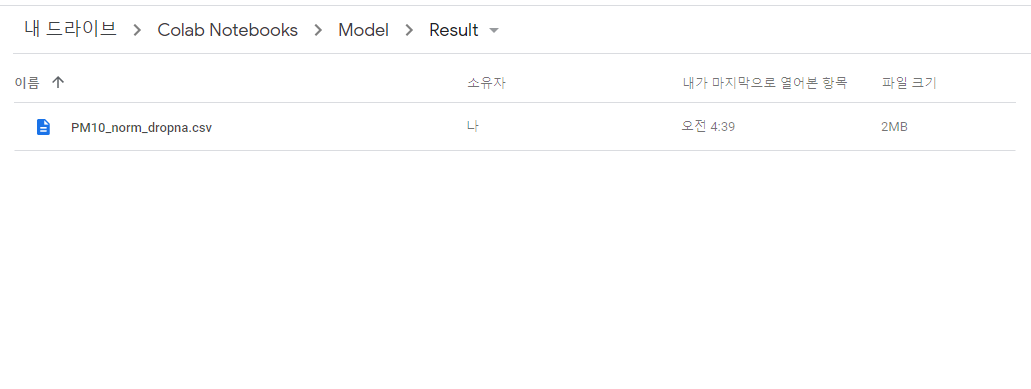